<a href="https://colab.research.google.com/github/imperialHCE/theprojects/blob/master/Credit_Risk_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit Risk Estimation


- Credit risk arises when a borrower is not able to pay the debt.
- causes losses for financial institution
- *Basel* closely monitors recent development in financial markets and sets regulation to strengthen bank capital requirements

- *Basel III 2010* suggest banks to implement either a standardized approach or an internal ratings-based (IRB) approach to estimate credit risk.
### IRB approach
Key parameters
- Expected loss = EAD x LGD x PD
- PD: probability of default, LGD: loss given default (0-1), EAD: exposure at default

- Most challenging part of credit risk: PD

___Risk bucketing___
- grouping borrowers with similar creditworthiness
- create homogeneous groups/clusters to better estimate credit risk
- clustering using K-means

__German Credit Risk Dataset__
- Downloaded from : http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data


In [12]:
import pandas as pd
df=pd.read_csv("german_data.csv",sep=" ",header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [13]:
headers=["Status of existing checking account","Duration in month","Credit history",\
         "Purpose","Credit amount","Savings account/bonds","Present employment since",\
         "Installment rate in percentage of disposable income","Personal status and sex",\
         "Other debtors / guarantors","Present residence since","Property","Age in years",\
        "Other installment plans","Housing","Number of existing credits at this bank",\
        "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","Risk"]
df.columns = headers

In [14]:
#for structuring only
Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': "0 <= <200 DM",'A13':">= 200 DM "}
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)

Credit_history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
df["Credit history"]=df["Credit history"].map(Credit_history)

Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)

Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
df["Present employment since"]=df["Present employment since"].map(Present_employment)



Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
df["Personal status and sex"]=df["Personal status and sex"].map(Personal_status_and_sex)


Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)


Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)




Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)




Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':"yes", 'A191':"none"}
df["Telephone"]=df["Telephone"].map(Telephone)



foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign worker"]=df["foreign worker"].map(foreign_worker)



risk={1:"Good Risk", 2:"Bad Risk"}
df["Risk"]=df["Risk"].map(risk)

In [15]:
# Let us pull out features to be used in the study
df = df[['Age in years', 'Credit history','Duration in month', 'Credit amount', 'Risk']]
df.to_csv("german_credit_trimmed.csv",index=False) #save as csv file


In [11]:
df.describe()

,Age in years,Duration in month,Credit amount
count,1000.000000,1000.000000,1000.000000
mean,35.546000,20.903000,3271.258000
std,11.375469,12.058814,2822.736876
min,19.000000,4.000000,250.000000
25%,27.000000,12.000000,1365.500000
50%,33.000000,18.000000,2319.500000
75%,42.000000,24.000000,3972.250000
max,75.000000,72.000000,18424.000000


In [16]:
# Create a label encode for the categorical variable
# Risk is the target variable
# A rough glance at the label_ch suggest higher values are desired by the lender (banks)
label_ch = {"critical account":0,"delay in paying off":1,"existing credits paid back duly till now":2,\
                 "all credits at this bank paid back duly":3,"no credits taken":4}

df["Credit history"]=df["Credit history"].map(label_ch)
# df['Credit history'] = label_encoder.fit_transform(df['Credit history'])

label_risk ={"Good Risk":1, "Bad Risk":0}
df['Risk'] = df['Risk'].map(label_risk)


<ipython-input-16-46f35bde1ab1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Credit history"]=df["Credit history"].map(label_ch)
<ipython-input-16-46f35bde1ab1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Risk'] = df['Risk'].map(label_risk)


In [17]:
df

,Age in years,Credit history,Duration in month,Credit amount,Risk
0,67,0,6,1169,1
1,22,2,48,5951,0
2,49,0,12,2096,1
3,45,2,42,7882,1
4,53,1,24,4870,0
...,...,...,...,...,...
995,31,2,12,1736,1
996,40,2,30,3857,1
997,38,2,12,804,1
998,23,2,45,1845,0


Let us do some Interpretable ML exercises using PiML.

In [19]:
!pip install PiML
from piml import Experiment

exp = Experiment()
exp.data_loader(data=df)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 28.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.6/211.6 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of ortools to determine

,Age in years,Credit history,Duration in month,Credit amount,Risk
0,67,0,6,1169,1
1,22,2,48,5951,0
2,49,0,12,2096,1
3,45,2,42,7882,1
4,53,1,24,4870,0
...,...,...,...,...,...
995,31,2,12,1736,1
996,40,2,30,3857,1
997,38,2,12,804,1
998,23,2,45,1845,0


In [20]:
from piml.models import GLMClassifier, ExplainableBoostingClassifier, XGB1Classifier, XGB2Classifier
exp.data_prepare(target="Risk", task_type="classification", silent=True)


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [21]:
exp.feature_select()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [22]:
exp.model_train(GLMClassifier(), name="GLM")
exp.model_train(ExplainableBoostingClassifier(), name="EBM")
exp.model_train(XGB2Classifier(), name="XGB2")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [23]:
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [24]:
exp.model_diagnose()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [25]:
exp.model_compare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Let us move on to calculate __Probability of default__ (the chances that the borrower is not paying the loan) using various ML techniques.

In [26]:
# Dropping "Risk" because it is the target variable
numerical_credit = df.drop('Risk', axis=1)
numerical_credit

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,Age in years,Credit history,Duration in month,Credit amount
0,67,0,6,1169
1,22,2,48,5951
2,49,0,12,2096
3,45,2,42,7882
4,53,1,24,4870
...,...,...,...,...
995,31,2,12,1736
996,40,2,30,3857
997,38,2,12,804
998,23,2,45,1845


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

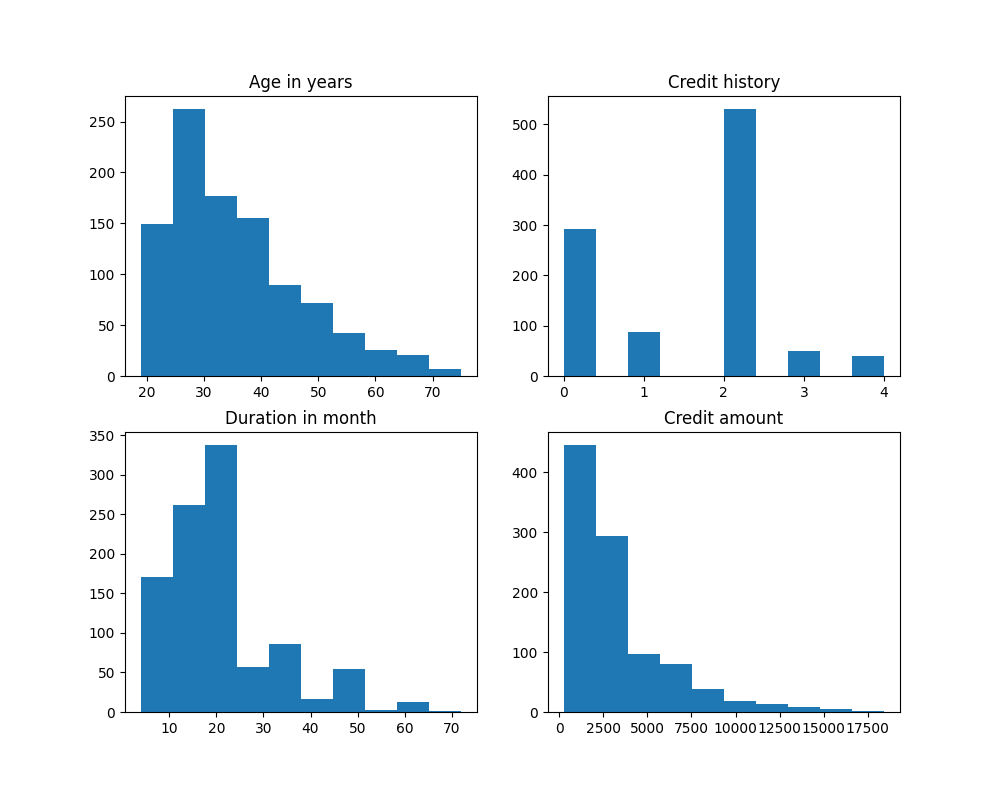

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
k = 0
cols = numerical_credit.columns
for i,j in zip(range(len(cols)), cols):
    k +=1
    plt.subplot(2,2,k)
    plt.hist(numerical_credit.iloc[:,i])
    plt.title(j)

- does not follow normal distribution
- positively skewed

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

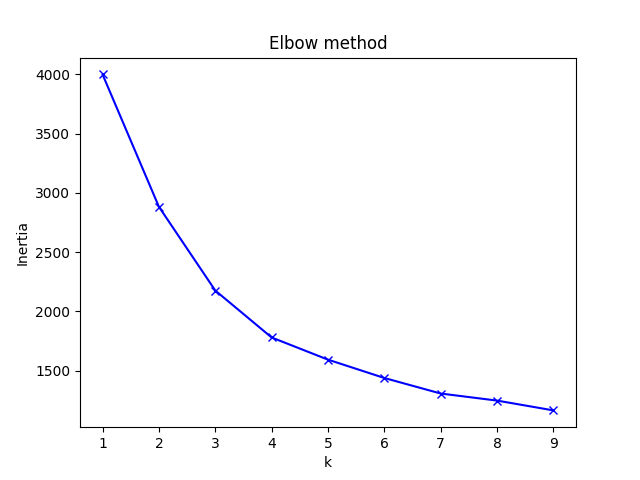

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

scaler = StandardScaler()
scaled_credit = scaler.fit_transform(numerical_credit)

distance = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(scaled_credit)
    distance.append(kmeans.inertia_)

plt.plot(range(1,10), distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

- Curve gets flatter after 4 cluseters
- Stop at 4 clusters

__Silhouette Scores__

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

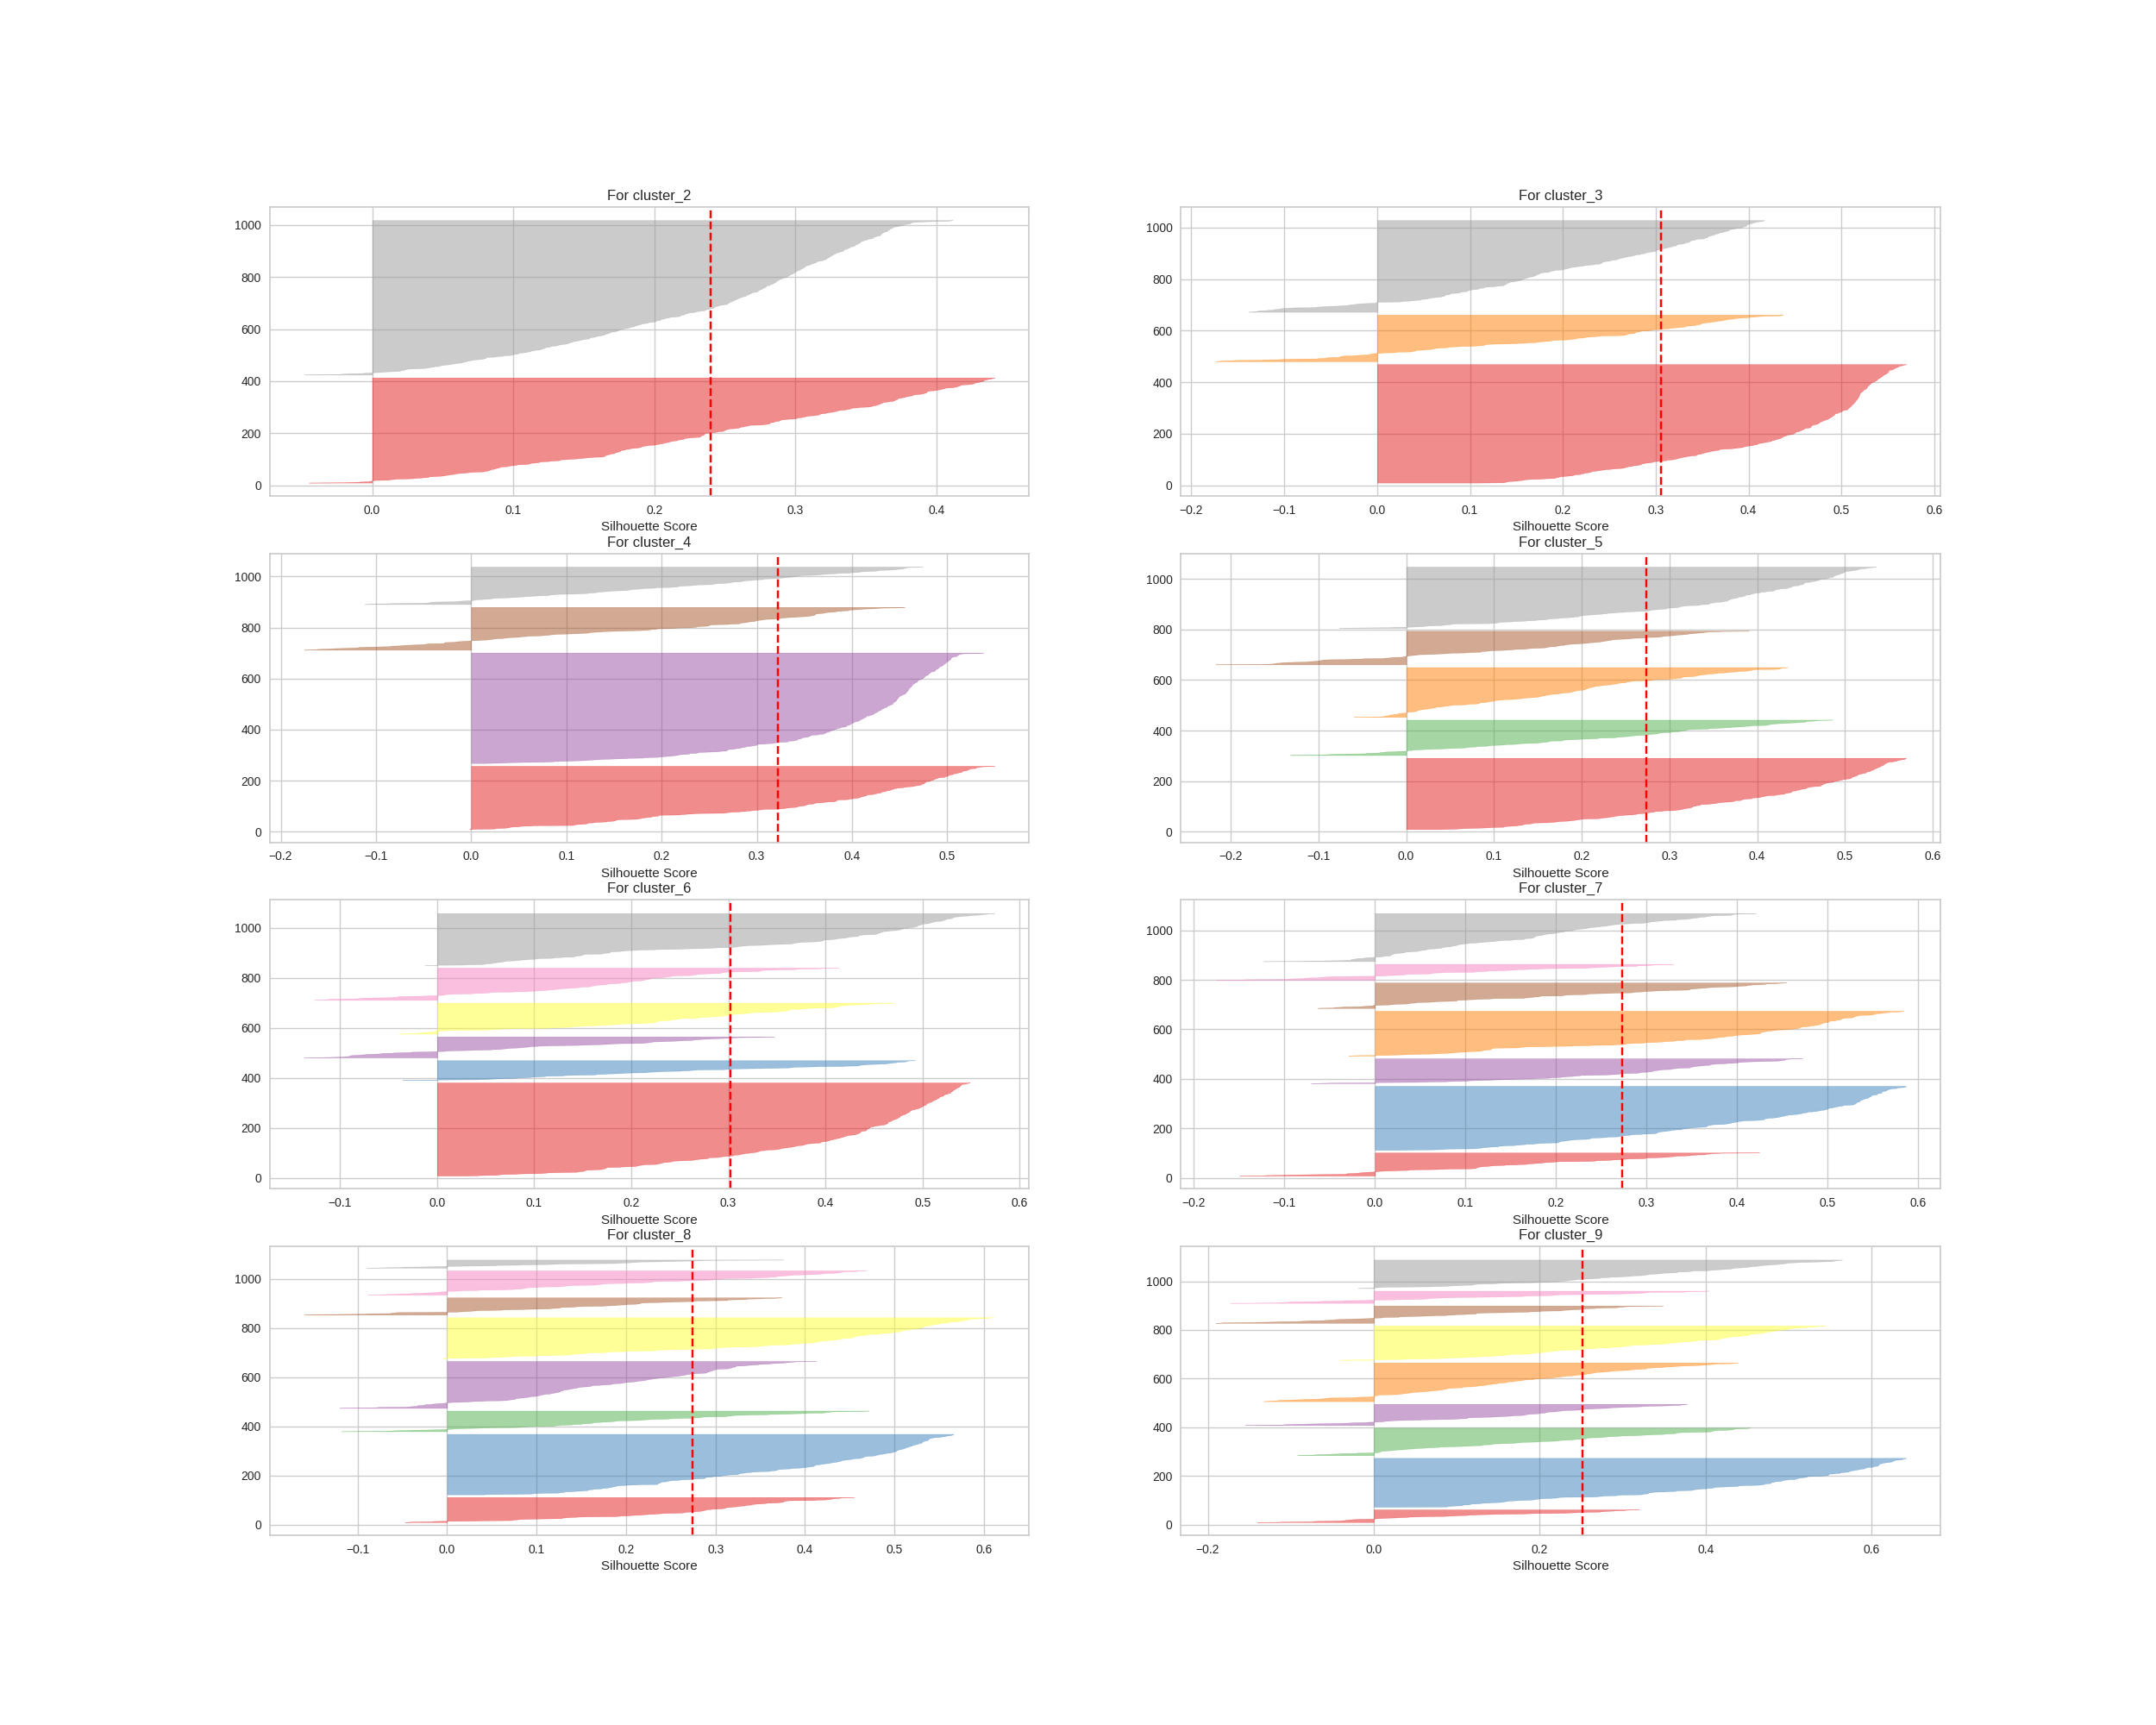

In [29]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4,2,figsize=(25,20))

for i in range(2,10):
    km = KMeans(n_clusters=i, n_init='auto')
    q, r = divmod(i,2)
    visualizer = SilhouetteVisualizer(km, color='yellowbrick',\
                                     ax=ax[q-1][r])
    visualizer.fit(scaled_credit)
    ax[q-1][r].set_title('For cluster_'+str(i))
    ax[q-1][r].set_xlabel('Silhouette Score')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

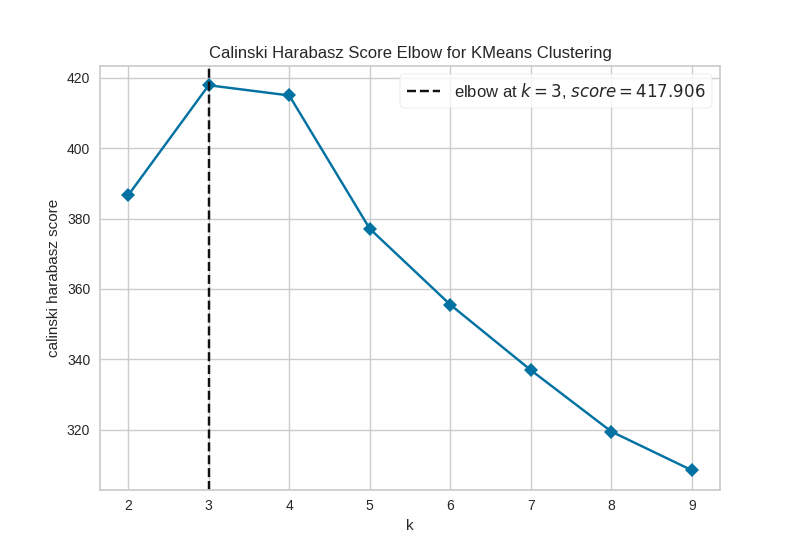

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [30]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer=KElbowVisualizer(model, k=(2,10), \
                            metric='calinski_harabasz',\
                           timings=False)
visualizer.fit(scaled_credit)
visualizer.show()

- This shows that the elbow occurs at the second cluster
- stopping at two clusters is the optimum decision
- The last step: GAP analysis

In [32]:
!pip install gap-stat
from gap_statistic.optimalK import OptimalK
optimalK = OptimalK(n_jobs=8, parallel_backend='joblib')
n_clusters = optimalK(scaled_credit, cluster_array=np.arange(1,10))

gap_result = optimalK.gap_df
gap_result.head()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=8af44ce31ae8eb6d9f2d7bee3a4cda13ace3646afcbc6153d67253a0ba504a71
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat


,n_clusters,gap_value,ref_dispersion_std,sk,gap*,sk*,diff,diff*
0,1.0,0.844097,45.318179,0.005617,5303.612111,6124.307325,0.037184,5937.853183
1,2.0,0.866014,357.402624,0.059102,3980.268480,4614.509553,-0.061669,4518.590870
2,3.0,0.949968,109.787945,0.022284,3466.798257,4005.120647,-0.011907,3921.764859
3,4.0,0.975273,54.686219,0.013399,2937.150734,3392.117336,0.017621,3339.750816
4,5.0,0.967226,34.731018,0.009574,2600.716950,3003.317032,0.055617,2948.284690


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Text(0, 0.5, 'Gap')

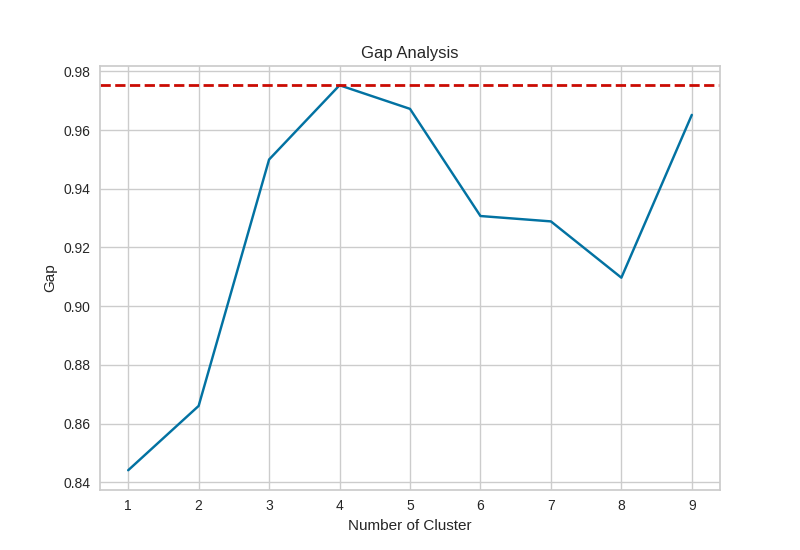

In [33]:
plt.plot(gap_result.n_clusters, gap_result.gap_value)
min_ylim, max_ylim = plt.ylim()
plt.axhline(np.max(gap_result.gap_value), color='r', linestyle='dashed', linewidth=2)
plt.title('Gap Analysis')
plt.xlabel('Number of Cluster')
plt.ylabel('Gap')


- Want to divide the total pool of borrowers into two groups/clusters
- Division will be based on the features using the KMeans algorithm
- End product of KMeans
    - Two groups of borrowers
    - Both will have certain fraction of borrowers with "Good Risk" and "Bad Risk"
- Why model different clusters?
    - There could be a group of borrowers who differ from other group of borrowers.
    - For e.g. there may be borrowers that differ in terms of credit amount, or their credit histories

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

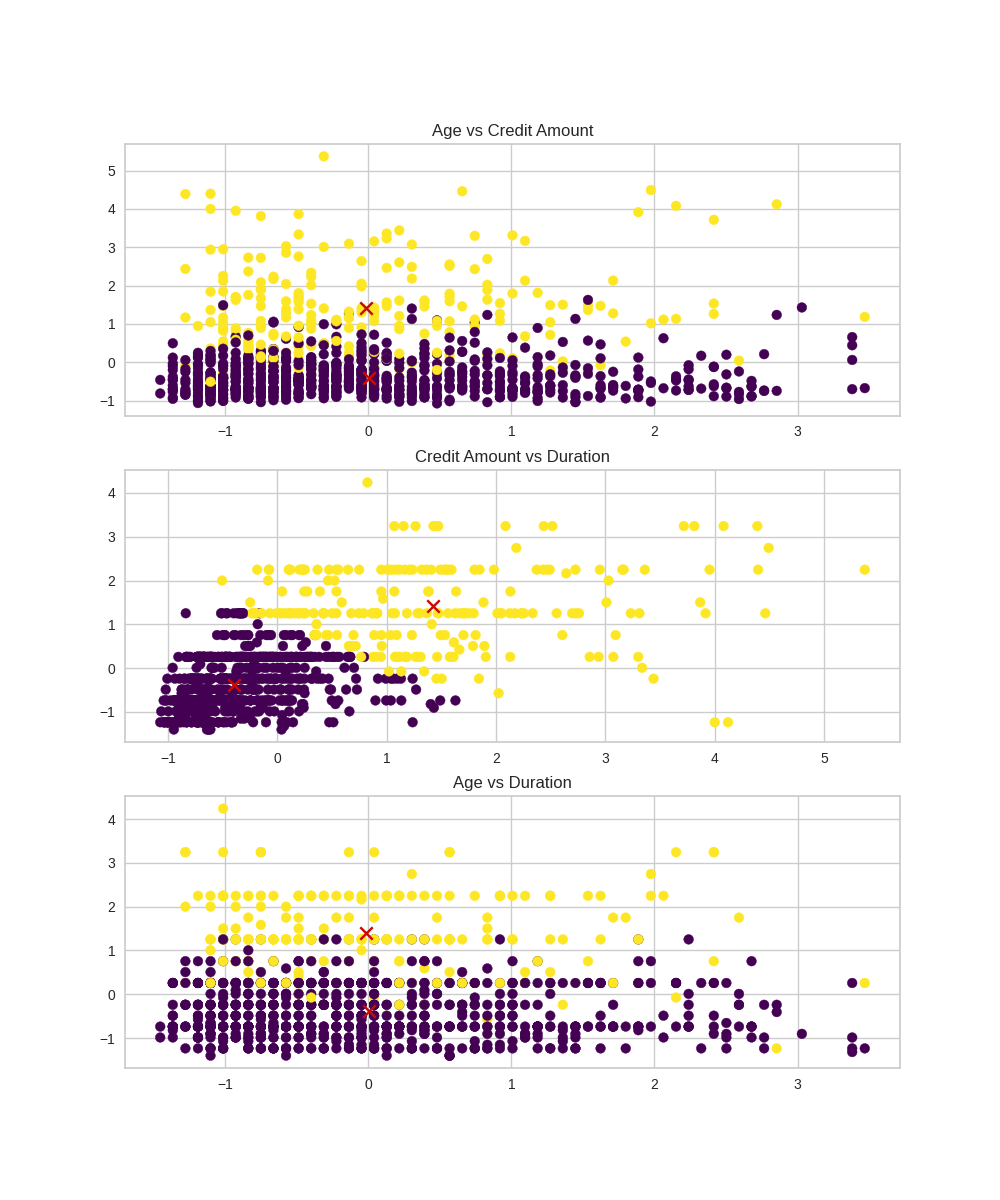

In [34]:
kmeans = KMeans(n_clusters=2, n_init='auto')
clusters = kmeans.fit_predict(scaled_credit)

plt.figure(figsize=(10,12))
plt.subplot(311)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 3],\
            c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],\
            kmeans.cluster_centers_[:, 3], s = 80,\
            marker= 'x', color = 'r')
plt.title('Age vs Credit Amount')
plt.subplot(312)
plt.scatter(scaled_credit[:, 3], scaled_credit[:, 2],\
            c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 3],\
            kmeans.cluster_centers_[:, 3], s = 80,\
            marker= 'x', color = 'r')
plt.title('Credit Amount vs Duration')
plt.subplot(313)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 2],\
            c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],\
            kmeans.cluster_centers_[:, 2], s = 80,\
            marker= 'x', color = 'r')
plt.title('Age vs Duration')
plt.show()

## PD Estimation with LogisticRegression
- Proposes a regression approach to the classification problem
- seeks to predict discrete output taking into account some independent variables

__Class imbalance__
- In credit risk analysis, it is uncommon to have a _class imbalance_
- _class imbalance_: one class dominates over other (for e.g. no. of burrowers with low risk outweigh those with high risk or vice-versa)
- various remedies
    - up-sampling, down-sampling
    - synthetic minority oversampling technique (SMOTE)
    - edit nearest neighbor (ENN)

In [35]:
clusters, counts = np.unique(kmeans.labels_, return_counts=True)
clusters_dict = {}
for i in range(len(clusters)):
    clusters_dict[i] = scaled_credit[np.where(kmeans.labels_==i)]

# Add a new column that states what cluster the sample belongs to
df['clusters'] = pd.DataFrame(kmeans.labels_)

df_scaled = pd.DataFrame(scaled_credit)
df_scaled['clusters'] = df['clusters']

df_scaled['Risk'] = df['Risk']
df_scaled.columns = ['Age','Credit History', 'Duration', 'Credit amount', 'Clusters','Risk']
df_scaled.describe()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,Age,Credit History,Duration,Credit amount,Clusters,Risk
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,5.329071e-17,3.730349e-17,1.136868e-16,6.661338e-17,0.218000,0.700000
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,0.413094,0.458487
min,-1.455261e+00,-1.344014e+00,-1.402415e+00,-1.070865e+00,0.000000,0.000000
25%,-7.516417e-01,-1.344014e+00,-7.386675e-01,-6.754833e-01,0.000000,0.000000
50%,-2.239269e-01,5.034280e-01,-2.408572e-01,-3.373443e-01,0.000000,1.000000
75%,5.676451e-01,5.034280e-01,2.569531e-01,2.484620e-01,0.000000,1.000000
max,3.470076e+00,2.350870e+00,4.239436e+00,5.370789e+00,1.000000,1.000000


In [36]:
# Number of "Good Risk" and "Bad Risk" borrowers in Cluster 0 (or the first cluster)
df_scaled[df_scaled.Clusters==0]['Risk'].value_counts()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

1    577
0    205
Name: Risk, dtype: int64

In [37]:
# Number of "Good Risk" and "Bad Risk" borrowers in Cluster 1 (or the second cluster)
df_scaled[df_scaled.Clusters==1]['Risk'].value_counts()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

1    123
0     95
Name: Risk, dtype: int64

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

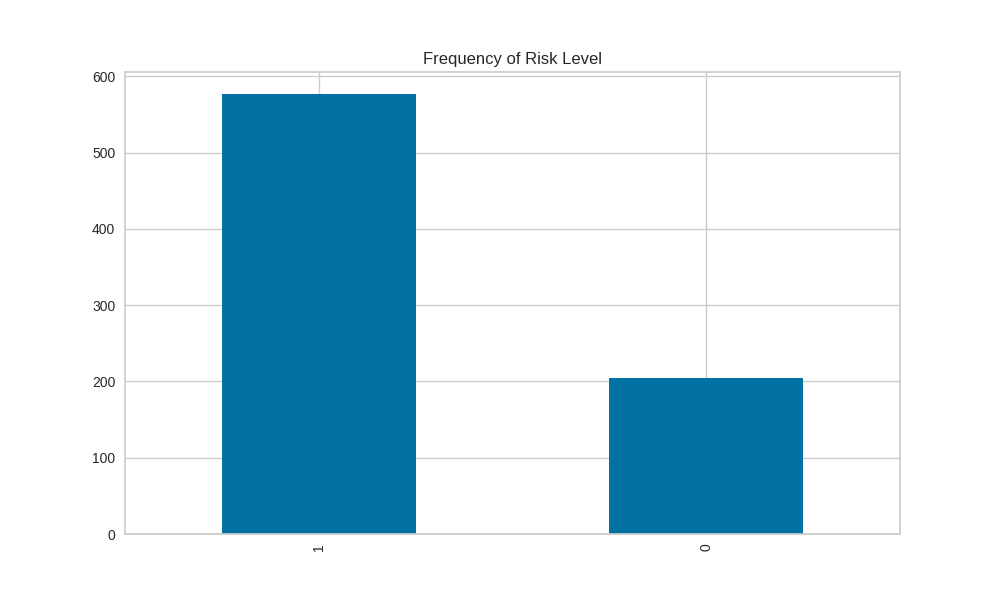

In [38]:
df_scaled[df_scaled.Clusters == 0]['Risk'].value_counts().plot(kind='bar',\
                            figsize=(10, 6),title="Frequency of Risk Level");


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

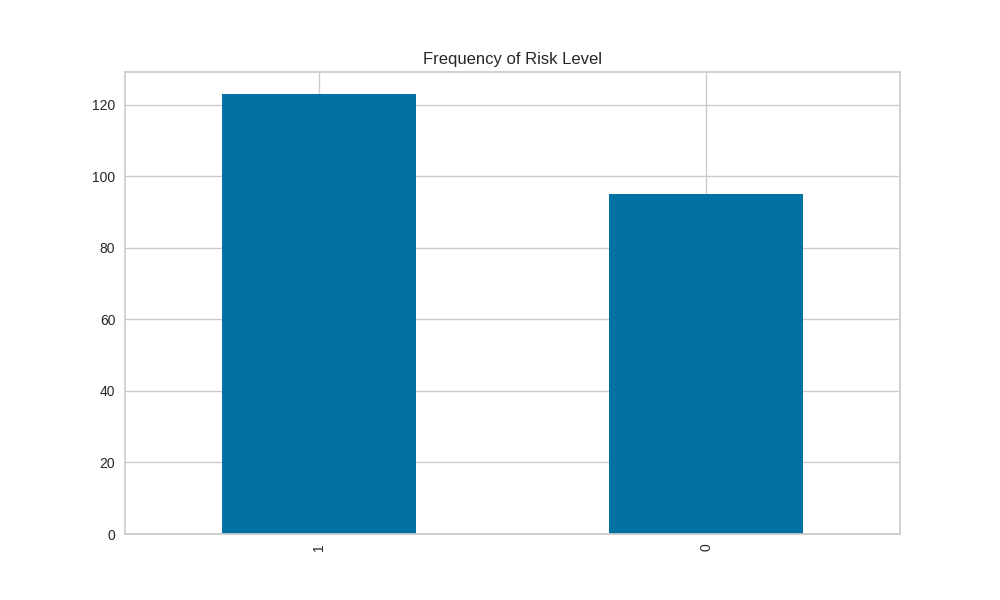

In [39]:
df_scaled[df_scaled.Clusters == 1]['Risk'].value_counts().plot(kind='bar',
                            figsize=(10, 6),title="Frequency of Risk Level");

- Cluster 0 has a greater class imbalance compared to Cluster 1

In [40]:
from sklearn.model_selection import train_test_split

# Select your feature space (remove target variable)
X = df_scaled.drop('Risk', axis=1)
y = df_scaled.loc[:,['Risk','Clusters']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Define training sets in each cluster: Also make sure the 'Clusters' column is removed
first_cluster_train = X_train[X_train.Clusters == 0].iloc[:, :-1]
second_cluster_train = X_train[X_train.Clusters == 1].iloc[:, :-1]


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [41]:
print("There are ",len(first_cluster_train), " training examples in Cluster 0.")
print("There are ",len(second_cluster_train), " training examples in Cluster 1.")
print("See what the total number of training example is. Is it 80% of the total example?")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

There are  619  training examples in Cluster 0.
There are  181  training examples in Cluster 1.
See what the total number of training example is. Is it 80% of the total example?


__Training a Logistic Regression for Cluster 0__

In [42]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings('ignore')

X_train1 = first_cluster_train
y_train1 = y_train[y_train.Clusters==0]['Risk']
smoteenn = SMOTEENN(random_state=50)
X_train1, y_train1 = smoteenn.fit_resample(X_train1, y_train1.ravel())
logit = sm.Logit(y_train1, X_train1)
logit_fit1 = logit.fit()
print(logit_fit1.summary())

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Optimization terminated successfully.
         Current function value: 0.456417
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  476
Model:                          Logit   Df Residuals:                      472
Method:                           MLE   Df Model:                            3
Date:                Mon, 01 Jan 2024   Pseudo R-squ.:                  0.3405
Time:                        13:13:28   Log-Likelihood:                -217.25
converged:                       True   LL-Null:                       -329.43
Covariance Type:            nonrobust   LLR p-value:                 2.303e-48
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Age                0.1194      0.127      0.941      0.347      -0.129       0.368
Credit History   

__Understanding the summary__
- Age and Credit amount have +ve coef: rise in Age and Credit amount imply a higher PD
- Credit History and Duration have -ve coef: slide in Credit History and Duration imply higher PD
    - shorter duration loans have higher PD
    - bad credit history has higher PD
__Interpreation of coef__
- Let us look at 0.2665 for the age
    - odds ratio = exp(0.2665) = 1.305
    - one unit increase in Age, the PD increases by 30.5 %
    - does not mean the difference in PD between 45 yr and 46 yr old borrower (with other variables same) is 30.5% because the Age variable is scaled
    - mean = 35.54, std = 11.37
    - Since unit increase in scaled age = 35.54+11.37 years, the PD of a borrower 47 yrs older than another borrower, with the same set of other variables, is 30.5% higher.
    

In [43]:
first_cluster_test = X_test[X_test.Clusters==0].iloc[:,:-1]
second_cluster_test = X_test[X_test.Clusters==1].iloc[:,:-1]
X_test1 = first_cluster_test
y_test1 = y_test[y_test.Clusters == 0]['Risk']
pred_prob1 = logit_fit1.predict(X_test1)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

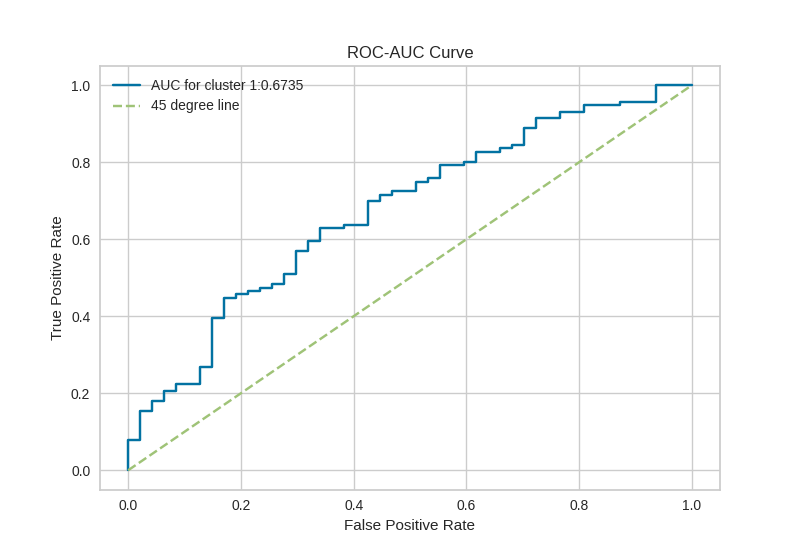

In [44]:
false_pos, true_pos, _ = roc_curve(y_test1.values, pred_prob1)
auc = roc_auc_score(y_test1, pred_prob1)
plt.plot(false_pos, true_pos, label='AUC for cluster 1:{:.4f}'.format(auc))
plt.plot([0,1],[0,1], linestyle='--', label='45 degree line')
plt.legend(loc='best')
plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

ROC (Receiver Operating Characteristic) Curve
- plot of TP rate against FP rate across different classification thresholds
-  45-degree line represents a random guess
Area Under the Curve (AUC)
- AUC is the area under the ROC curve
- ranges from 0 to 1
- 0.5: random model, 1.0: perfect model
- higher AUC means better model in terms of its ability to distinguish between positive and negative samples

Let us repeat this ROC-AUC for the second cluster

In [45]:
X_train2 = second_cluster_train
y_train2 = y_train[y_train.Clusters==1]['Risk']
smoteenn = SMOTEENN(random_state=50)
X_train2, y_train2 = smoteenn.fit_resample(X_train2, y_train2.ravel())
logit = sm.Logit(y_train2, X_train2)
logit_fit2 = logit.fit()
print(logit_fit2.summary())

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Optimization terminated successfully.
         Current function value: 0.442757
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   52
Model:                          Logit   Df Residuals:                       48
Method:                           MLE   Df Model:                            3
Date:                Mon, 01 Jan 2024   Pseudo R-squ.:                  0.3585
Time:                        13:13:57   Log-Likelihood:                -23.023
converged:                       True   LL-Null:                       -35.890
Covariance Type:            nonrobust   LLR p-value:                 1.085e-05
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Age                0.6533      0.532      1.227      0.220      -0.390       1.697
Credit History   

- Note how the coefficients are different comapared to the first cluster.
- Also because the P>|z| are large for three out of four, the estimated coeff are statistically insignificant at 95% confidence level
- So don't interpret the results further

In [46]:
X_test2 = second_cluster_test
y_test2 = y_test[y_test.Clusters==1]['Risk']
pred_prob2 = logit_fit2.predict(X_test2)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

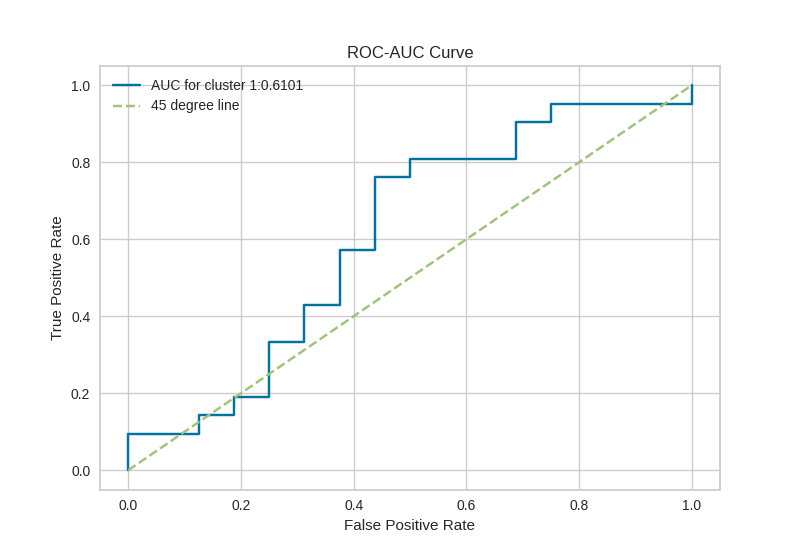

In [47]:
false_pos, true_pos, _ = roc_curve(y_test2.values, pred_prob2)
auc = roc_auc_score(y_test2, pred_prob2)
plt.plot(false_pos, true_pos, label='AUC for cluster 1:{:.4f}'.format(auc))
plt.plot([0,1],[0,1], linestyle='--', label='45 degree line')
plt.legend(loc='best')
plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The AUC score for both the clusters suggest that the logistic regression is not doing a good at modeling PD for the credit data.


## PD Estimation wiht Support Vector Machines
- parametric method

In [48]:
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import time
import warnings
warnings.filterwarnings('ignore')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [49]:
params_svc ={'gamma': [1e-6,1e-2], \
            'C':[0.001,0.09,1,5,10],\
            'kernel':('linear','rbf')}

svc = SVC(class_weight='balanced')
halve_SVC = HalvingRandomSearchCV(svc, params_svc, scoring='roc_auc', n_jobs=-1)
halve_SVC.fit(X_train1, y_train1)
print('Best hyperparameters for Cluster 0 in SVC {} with {}'.format(halve_SVC.best_score_, halve_SVC.best_params_))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Best hyperparameters for Cluster 0 in SVC 0.85328388372893 with {'kernel': 'linear', 'gamma': 1e-06, 'C': 0.09}


In [50]:
y_pred_SVC1 = halve_SVC.predict(X_test1)
print('The ROC-AUC score is {:.4f}'.format(roc_auc_score(y_test1, y_pred_SVC1)))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

The ROC-AUC score is 0.6330


__Calulation for Cluster 1__

In [51]:
halve_SVC.fit(X_train2, y_train2)
print('Best hyperparameters for Cluster 0 in SVC {} with {}'.format(halve_SVC.best_score_, halve_SVC.best_params_))
y_pred_SVC2 = halve_SVC.predict(X_test2)
print('The ROC-AUC score is {:.4f}'.format(roc_auc_score(y_test2, y_pred_SVC2)))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Best hyperparameters for Cluster 0 in SVC nan with {'kernel': 'linear', 'gamma': 0.01, 'C': 1}
The ROC-AUC score is 0.5893


- SVC is not doing a good job
- probably because the data is not clearly separable
- implies SVC does not work will with low-dimensional data
## Probability of Default Estimation using RF
- RF might outperform SVC because its prediction is better with large number of samples
- non-parametric: model with infinite number of parameters

In [52]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=50)

param_rfc = {'n_estimators':[100,300],\
            'criterion':['gini','entropy'],\
            'max_features':['auto', 'sqrt', 'log2'],\
            'max_depth':[3,4,5,6],\
            'min_samples_split':[5,10]}

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [53]:
halve_RF = HalvingRandomSearchCV(rfc, param_rfc, scoring='roc_auc', n_jobs=-1)
halve_RF.fit(X_train1,y_train1)
print('Best hyperparameters for Cluster 0 in RF {} with {}'.format(halve_RF.best_score_, halve_RF.best_params_))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Best hyperparameters for Cluster 0 in RF 0.9237804429552142 with {'n_estimators': 100, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'gini'}


In [54]:
y_pred_RF1 = halve_RF.predict(X_test1)
print('The ROC-AUC score for Cluster 0 is {:.4f}'.format(roc_auc_score(y_test1, y_pred_RF1)))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

The ROC-AUC score for Cluster 0 is 0.6761


In [55]:
halve_RF.fit(X_train2, y_train2)
print('Best hyperparameters for Cluster 0 in RF {} with {}'.format(halve_RF.best_score_, halve_RF.best_params_))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Best hyperparameters for Cluster 0 in RF 1.0 with {'n_estimators': 100, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'entropy'}


In [56]:
y_pred_RF2 = halve_RF.predict(X_test2)
print('The ROC-AUC score for Cluster 0 is {:.4f}'.format(roc_auc_score(y_test2, y_pred_RF2)))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

The ROC-AUC score for Cluster 0 is 0.7068
